In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import Sequential

In [ ]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\archive (2)\Admission_Predict_Ver1.1.csv")

In [ ]:
df.shape

(500, 8)

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 1.3476 - val_loss: 1.2058
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0048 - val_loss: 0.9101
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7661 - val_loss: 0.6946
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5776 - val_loss: 0.5439
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4485 - val_loss: 0.4361
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3588 - val_loss: 0.3506
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2871 - val_loss: 0.2759
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2190 - val_loss: 0.2023
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1586 - val_loss: 0.1199
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0827 - val_loss: 0.0657
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0562 - val_loss: 0.0446
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 69/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0103 - val_loss: 0.0093
Epoch 70/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 71/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 72/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 73/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0111 - val_loss: 0.0092
Epoch 74/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0095 - val_loss: 0.0089
Epoch 75/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0086 - val_loss: 0.0089
Epoch 76/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 77/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0083 - val_loss: 0.0088
Epoch 78/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - val_loss: 0.0089
Epoch 79/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - l

In [ ]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

# It shows the goodness of fit

0.585765017078263

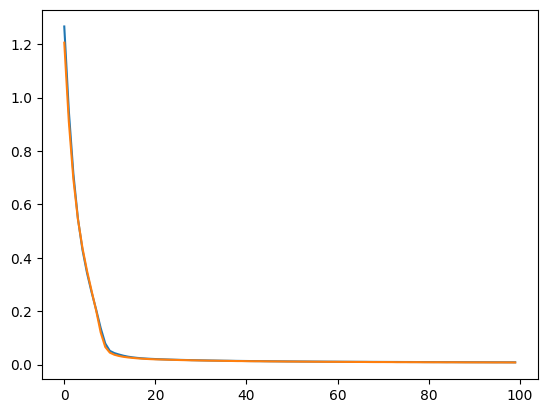

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])